In [1]:
import  pandas_datareader.data as pd_data
import datetime
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2021,11,26)
df = pd_data.DataReader('GOOGL','stooq',start,end)
#Google股票，世界银行从各种互联网资源中提取数据到pandas数据库中。stooq为来源之一


In [2]:
df.dropna(inplace=(True))#去除空值
df.sort_index(inplace=True)
#inplace(原地)排序，根据之前传进来的日期
print(df)

                 Open      High       Low     Close      Volume
Date                                                           
2004-08-19    50.0000    52.030    47.980    50.170  44703800.0
2004-08-20    50.5050    54.540    50.250    54.155  22857200.0
2004-08-23    55.3750    56.740    54.525    54.700  18274400.0
2004-08-24    55.6200    55.800    51.785    52.435  15262600.0
2004-08-25    52.4800    54.000    51.940    53.000   9197800.0
...               ...       ...       ...       ...         ...
2021-11-18  2964.8300  3011.610  2957.690  2996.770   1781411.0
2021-11-19  2999.5088  3019.330  2977.980  2978.530   1684969.0
2021-11-22  2986.6500  2996.590  2922.950  2926.040   1531460.0
2021-11-23  2923.0600  2933.200  2882.300  2915.640   1361558.0
2021-11-24  2909.4700  2924.985  2887.460  2922.400    902007.0

[4348 rows x 5 columns]


In [19]:
pre_days= 10 #目标是预测pre_days天后的,往上移动pre_days个
df['label']=df['Close'].shift(-pre_days)
#label列是收盘价的前pre_days天的结果

df[-12:]

,Open,High,Low,Close,Volume,label
Date,,,,,,
2021-11-09,2984.6600,2996.690,2944.8950,2978.37,976487.0,2915.64
2021-11-10,2950.0000,2961.400,2890.7500,2917.87,1498490.0,2922.40
2021-11-11,2929.7900,2950.710,2912.0100,2915.33,825874.0,NaN
2021-11-12,2932.3100,2977.000,2908.2201,2973.56,1118000.0,NaN
2021-11-15,2978.0100,2990.990,2951.5000,2969.04,1175352.0,NaN
2021-11-16,2962.9900,2975.250,2946.2500,2957.52,945200.0,NaN
2021-11-17,2960.5500,2971.190,2944.8000,2960.94,979975.0,NaN
2021-11-18,2964.8300,3011.610,2957.6900,2996.77,1781411.0,NaN
2021-11-19,2999.5088,3019.330,2977.9800,2978.53,1684969.0,NaN


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sca_X=scaler.fit_transform(df.iloc[:,:-1])
#iloc,pandas的类似数组的数据结构，所有行和0到倒数第2列，直接fit_transform
#fit_transform 先拟合数据(Compute the mean and std to be used for later scaling.)计算平均值和标准差，用于以后的缩放
#再实现统一处理（Perform standardization by centering and scaling.）通过居中和缩放执行标准化
print(sca_X[0])
#sca_X把每一列都做了处理

[-1.03431397 -1.03210208 -1.03592229 -1.03340352  4.92528248]


In [5]:
mem_his_days = 10
#记忆的天数
from collections import deque
deq = deque(maxlen=mem_his_days)
#队列的最大长度为记忆天数

X = []
for i in sca_X:
    list(i)
    deq.append(list(i))
    if len(deq)==mem_his_days:
        X.append(list(deq))
#X的shape是(4330,mem_his_days,5);每个样本存的是(mem_his_days，5)的shape
#每次fori的时候，i是一个5的张量，然后每次X.append5个张量，
# 也就是说mem_his_days天的数据*每天的5个特征
X_latey = X[-pre_days:]
print(len(X[0]))
print(len(X))
#少的是men_his_days-1，序列未满时的值
print(len(X_latey))
X=X[:-pre_days]
#删掉nan的值。
#得到纯粹的训练集
print(len(X))
y = df['label'].values[mem_his_days-1:-pre_days]
print(len(y))
#y标签从第mem_his_days-1天开始作为训练标签
#最后-pre_days个数据作为输出，而不是训练。


10
4339
10
4329
4329


In [6]:
import numpy as np
X = np.array(X)
#4330个样本，每个样本有(10天*每天5个特征)
y = np.array(y)
print(X.shape)
#4330个样本，每个样本5个特征
print(y.shape)
#4330个标签

(4329, 10, 5)
(4329,)


In [7]:
print(X[-1])
print(y[-1])

[[ 3.92039481  3.87574831  3.87943883  3.87312576 -0.60587104]
 [ 3.84994579  3.91255129  3.88022507  3.94832882 -0.56000371]
 [ 3.95161984  3.90589688  3.83101193  3.79261706 -0.53677359]
 [ 3.8328688   3.85710916  3.86937329  3.85886901 -0.62343506]
 [ 3.87812197  3.85914623  3.87820332  3.89876394 -0.66204941]
 [ 3.92005224  3.96318934  3.93754248  3.95591074 -0.59165497]
 [ 3.99010731  3.98335628  4.00282592  3.97591811 -0.59201939]
 [ 4.01256261  3.99310873  4.01089563  3.98204526 -0.69068128]
 [ 3.99228261  3.9666184   3.96991636  3.9781944  -0.71339444]
 [ 3.93291566  3.9067117   3.87635437  3.87464899 -0.64608167]]
2922.4


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False, test_size=0.1)
print(X_train.shape)

(3896, 10, 5)


In [9]:
#构建模型
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
model = Sequential()
#序列添加
model.add(LSTM(16,input_shape=X.shape[1:],activation='relu',return_sequences=True))
#一层16个lstm单元，返回16个序列的h隐藏变量给下一层
model.add(Dropout(0.1))



model.add(LSTM(16, activation='relu'))
#第二层，返回输出序列的最后一个输出
model.add(Dropout(0.1))

model.add(Dense(8,activation='relu'))
#全连接层
model.add(Dropout(0.1))

model.add(Dense(1))
#全连接层

model.compile(optimizer="Adam", loss="mse", metrics=["mape"])
#MeanAbsolutePercentageError 平均绝对百分比误差 metrics(度量)
#MeanSquaredError 均方误差


In [10]:
from tensorflow import keras

#tensorboard_callback = keras.callbacks.TensorBoard(log_dir='./logs/log')
#model.fit(X_train,y_train,batch_size=32,epochs=15,validation_data=(X_test,y_test),callbacks=[tensorboard_callback])
model.fit(X_train,y_train,batch_size=32,epochs=15,validation_data=(X_test,y_test))


Epoch 1/15
122/122 [==============================] - 28s 160ms/step - loss: 296922.8750 - mape: 89.1765 - val_loss: 3642892.0000 - val_mape: 70.6255
Epoch 2/15
122/122 [==============================] - 17s 141ms/step - loss: 32136.6855 - mape: 32.4088 - val_loss: 177022.8594 - val_mape: 15.8164
Epoch 3/15
122/122 [==============================] - 17s 139ms/step - loss: 24217.3906 - mape: 27.9045 - val_loss: 168890.4688 - val_mape: 15.1095
Epoch 4/15
122/122 [==============================] - 17s 140ms/step - loss: 18761.1172 - mape: 24.1113 - val_loss: 125800.0156 - val_mape: 13.2945
Epoch 5/15
122/122 [==============================] - 17s 139ms/step - loss: 18469.7207 - mape: 22.3523 - val_loss: 55633.9141 - val_mape: 9.5476
Epoch 6/15
122/122 [==============================] - 17s 139ms/step - loss: 17109.0547 - mape: 20.9001 - val_loss: 29943.1230 - val_mape: 7.8234
Epoch 7/15
122/122 [==============================] - 17s 139ms/step - loss: 16523.9746 - mape: 19.6402 - val_loss

In [11]:
from tensorflow.keras.models import load_model


#best_model = load_model('./logs/model')
best_model = model

In [13]:
#print("input_shape:",X.shape[1:])
print(best_model.summary())
print(best_model.evaluate(X_test,y_test))
pre = best_model.predict(X_test)

model.save("./logs/model")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 16)            1408      
                                                                 
 dropout (Dropout)           (None, 10, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9

In [14]:
print(len(y_test))
print(len(pre))

433
433


433


<function matplotlib.pyplot.show(close=None, block=None)>

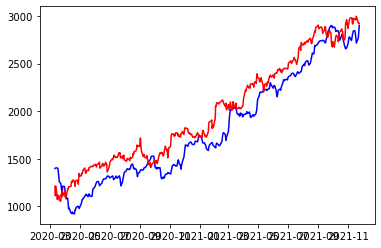

In [15]:
import matplotlib.pyplot as plt

df_time = df.index[-len(y_test):]
print(len(df_time))
#y_tests=y_test[:-10]

#y_testss=np.insert(y_tests,0,[0,0,0,0,0,0,0,0,0,0])
plt.plot(df_time,pre,color='blue',label='pre')
plt.plot(df_time,y_test,color='red',label='price')
plt.show

In [16]:
print(len(y_test))

433


In [17]:
X.shape[1:]

(10, 5)